In [7]:
%matplotlib inline
import sys 

sys.path.append('..')
from preamble import *
plt.rcParams['image.cmap'] = "gray"

from sklearn.model_selection import train_test_split


#### 3.4.2 Non-Negative Matrix Factorization (NMF)
![Alt text](http://cfile24.uf.tistory.com/image/990F9B405A3923AF21FB8F)

- NMF
  - It is a group of algorithms where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. Also, in applications such as processing of audio spectrograms or muscular activity, non-negativity is inherent to the data being considered. Since the problem is not exactly solvable in general, it is commonly approximated numerically.
  - 0 또는 양수로만 구성된 W와 H만을 생성
  - W와 H의 각 원소가 음수가 아니므로 원 데이터의 특성에 음수가 없어야 함.
  - https://en.wikipedia.org/wiki/Non-negative_matrix_factorization
- NMF 활용 데이터
  - 음성/악기 오디오 데이터
  - 여러 악기 또는 음성이 섞여 있는 데이터에서 각 원본 성분들을 구분할 수 있음
- PCA vs. NMF
  - PCA
    - 음수 성분이나 계수가 만드는 효과의 이해가 어려움. 
    - 실제로 부호에는 아무런 규칙이 없음
  - NMF
    - 상대적으로 PCA보다 해석하기 쉬움.
    - 모든 주성분 사이에 원본 데이터의 특질을 더 많이 포함하는 중요도 차이가 없음 --> 즉 모든 주성분은 동등하게 중요
    - W와 H의 무작위 초기화 --> 난수 생성 초기값에 따라 결과가 달라짐

##### Applying NMF to synthetic data
- 원본 데이터 확인
  - 원본 데이터의 각 성분이 양수인지 확인하는 작업 필요
  - 각 데이터가 원점 (0,0)에서 상대적으로 어디에 놓여 있는가가 중요.
  - 즉, 원점 (0,0)에서 데이터가 가는 방향을 추출한 것으로 음수미포함 성분을 이해 가능<br/><br/>  

- NMF 알고리즘
  - $V$: 원본 데이터 행렬
  - $W$: 새롭게 변환된 행렬
  - $H$: 주성분 행렬
  - the approximation of $V$ by $V \simeq WH$ is achieved by minimizing the error function $$\min_{W,H}|| V-WH ||_{F},~subject~to~W\geq 0, H\geq 0$$.
  - 아래 논문을 활용하여 위와 같은 최적화 문제 해결
    - Daniel D. Lee & H. Sebastian Seung (2001). Algorithms for Non-negative Matrix Factorization (PDF). Advances in Neural Information Processing Systems 13: Proceedings of the 2000 Conference. MIT Press. pp. 556–562.
    - 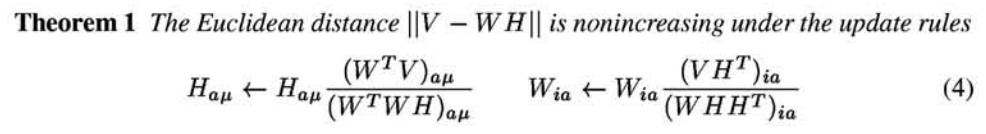

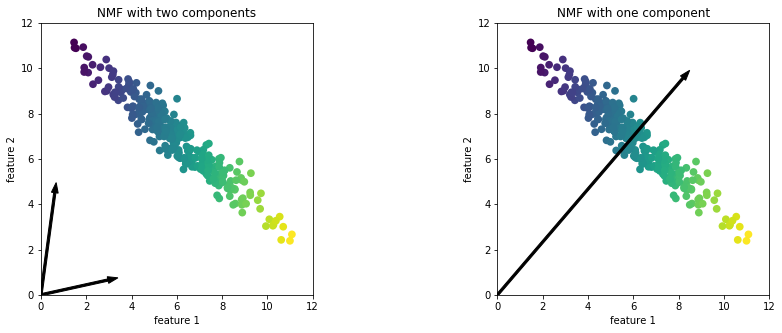

In [3]:
mglearn.plots.plot_nmf_illustration()

- 첫번째 그래프
  - 주성분 2개
    - 데이터의 각 특성마다 끝에 위치한 포인트를 가리키는 방향으로 주성분 구성
    - 총 100개의 원본 데이터: Shape (100, 2)에 대한 행렬 분해 결과
      - V (100 x 2) = W (100 x 2) x H (2 x 2)
  - 새롭게 변환된 특성 데이터: W (100 x 2)
- 두번째 그래프
  - 주성분 1개
    - 데이터를 가장 잘 표현하는 각 특성마다 평균값으로 향하는 주성분을 구성
    - 총 100개의 원본 데이터: Shape (100, 2)에 대한 행렬 분해 결과
      - V (100 x 2) = W (100 x 1) x H (1 x 2)
  - 새롭게 변환된 특성 데이터: W (100 x 1)

##### Applying NMF to face images

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[136.66667, ...,  62.     ],
       ...,
       [ 11.     , ..., 152.     ]], dtype=float32), 
array([[ 60.666668, ...,  68.666664],
       ...,
       [102.      , ...,  65.      ]], dtype=float32))
_____________________________________________________nmf_faces - 761.4s, 12.7min


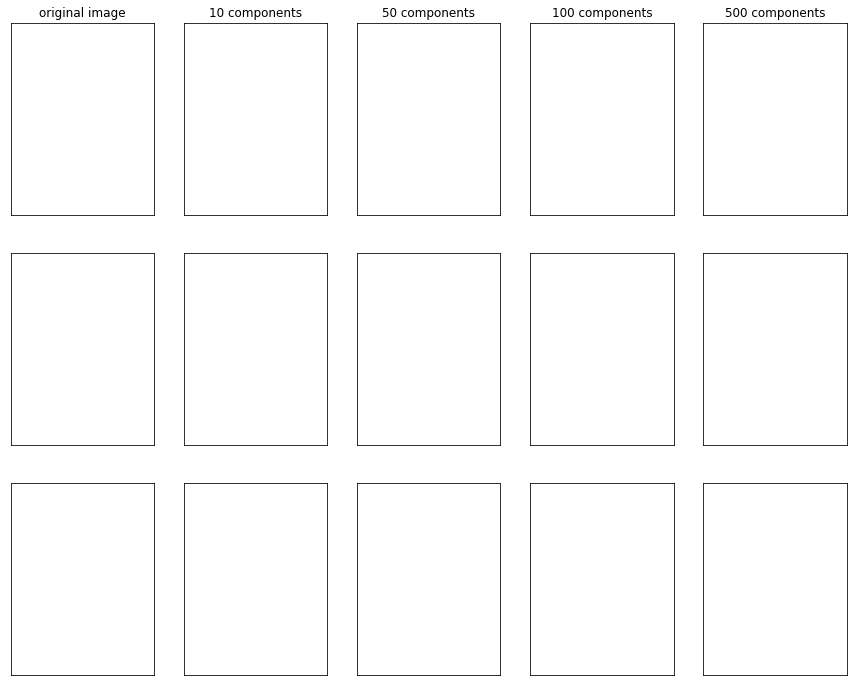

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

- 훈련 데이터에 대한 비음수 분해: V = WH
  - 원본 훈련 데이터 1,482개 V: Shape - (1486, 5655)
  - 새롭게 변환된 행렬 W: Shape - (1486, 15)
  - 주성분 데이터 H: Shape - (15, 5655)
<br/>
- 테스트 데이터에 대한 비음수 분해: V=WH
  - 원본 테스트 데이터 494개 V: Shape - (494, 5655)
  - 새롭게 변환된 행렬 W: Shape - (494, 15)
  - 주성분 데이터 H: Shape - (15, 5655)
<br/>  
- [주의] 훈련 데이터에 대한 Fit 이후 테스트 데이터에 대한 Transform
  - NMF는 Fit에 대한 의미없음
    - https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/decomposition/nmf.py#L1246
  - Transform 이 호출될 때 주어진 데이터에 대한 NMF 분해 시작하여 Transform의 반환값으로 W를 반환함.

Transformed Train Data Shape: (1482, 15)
Transformed Test Data Shape: (494, 15)


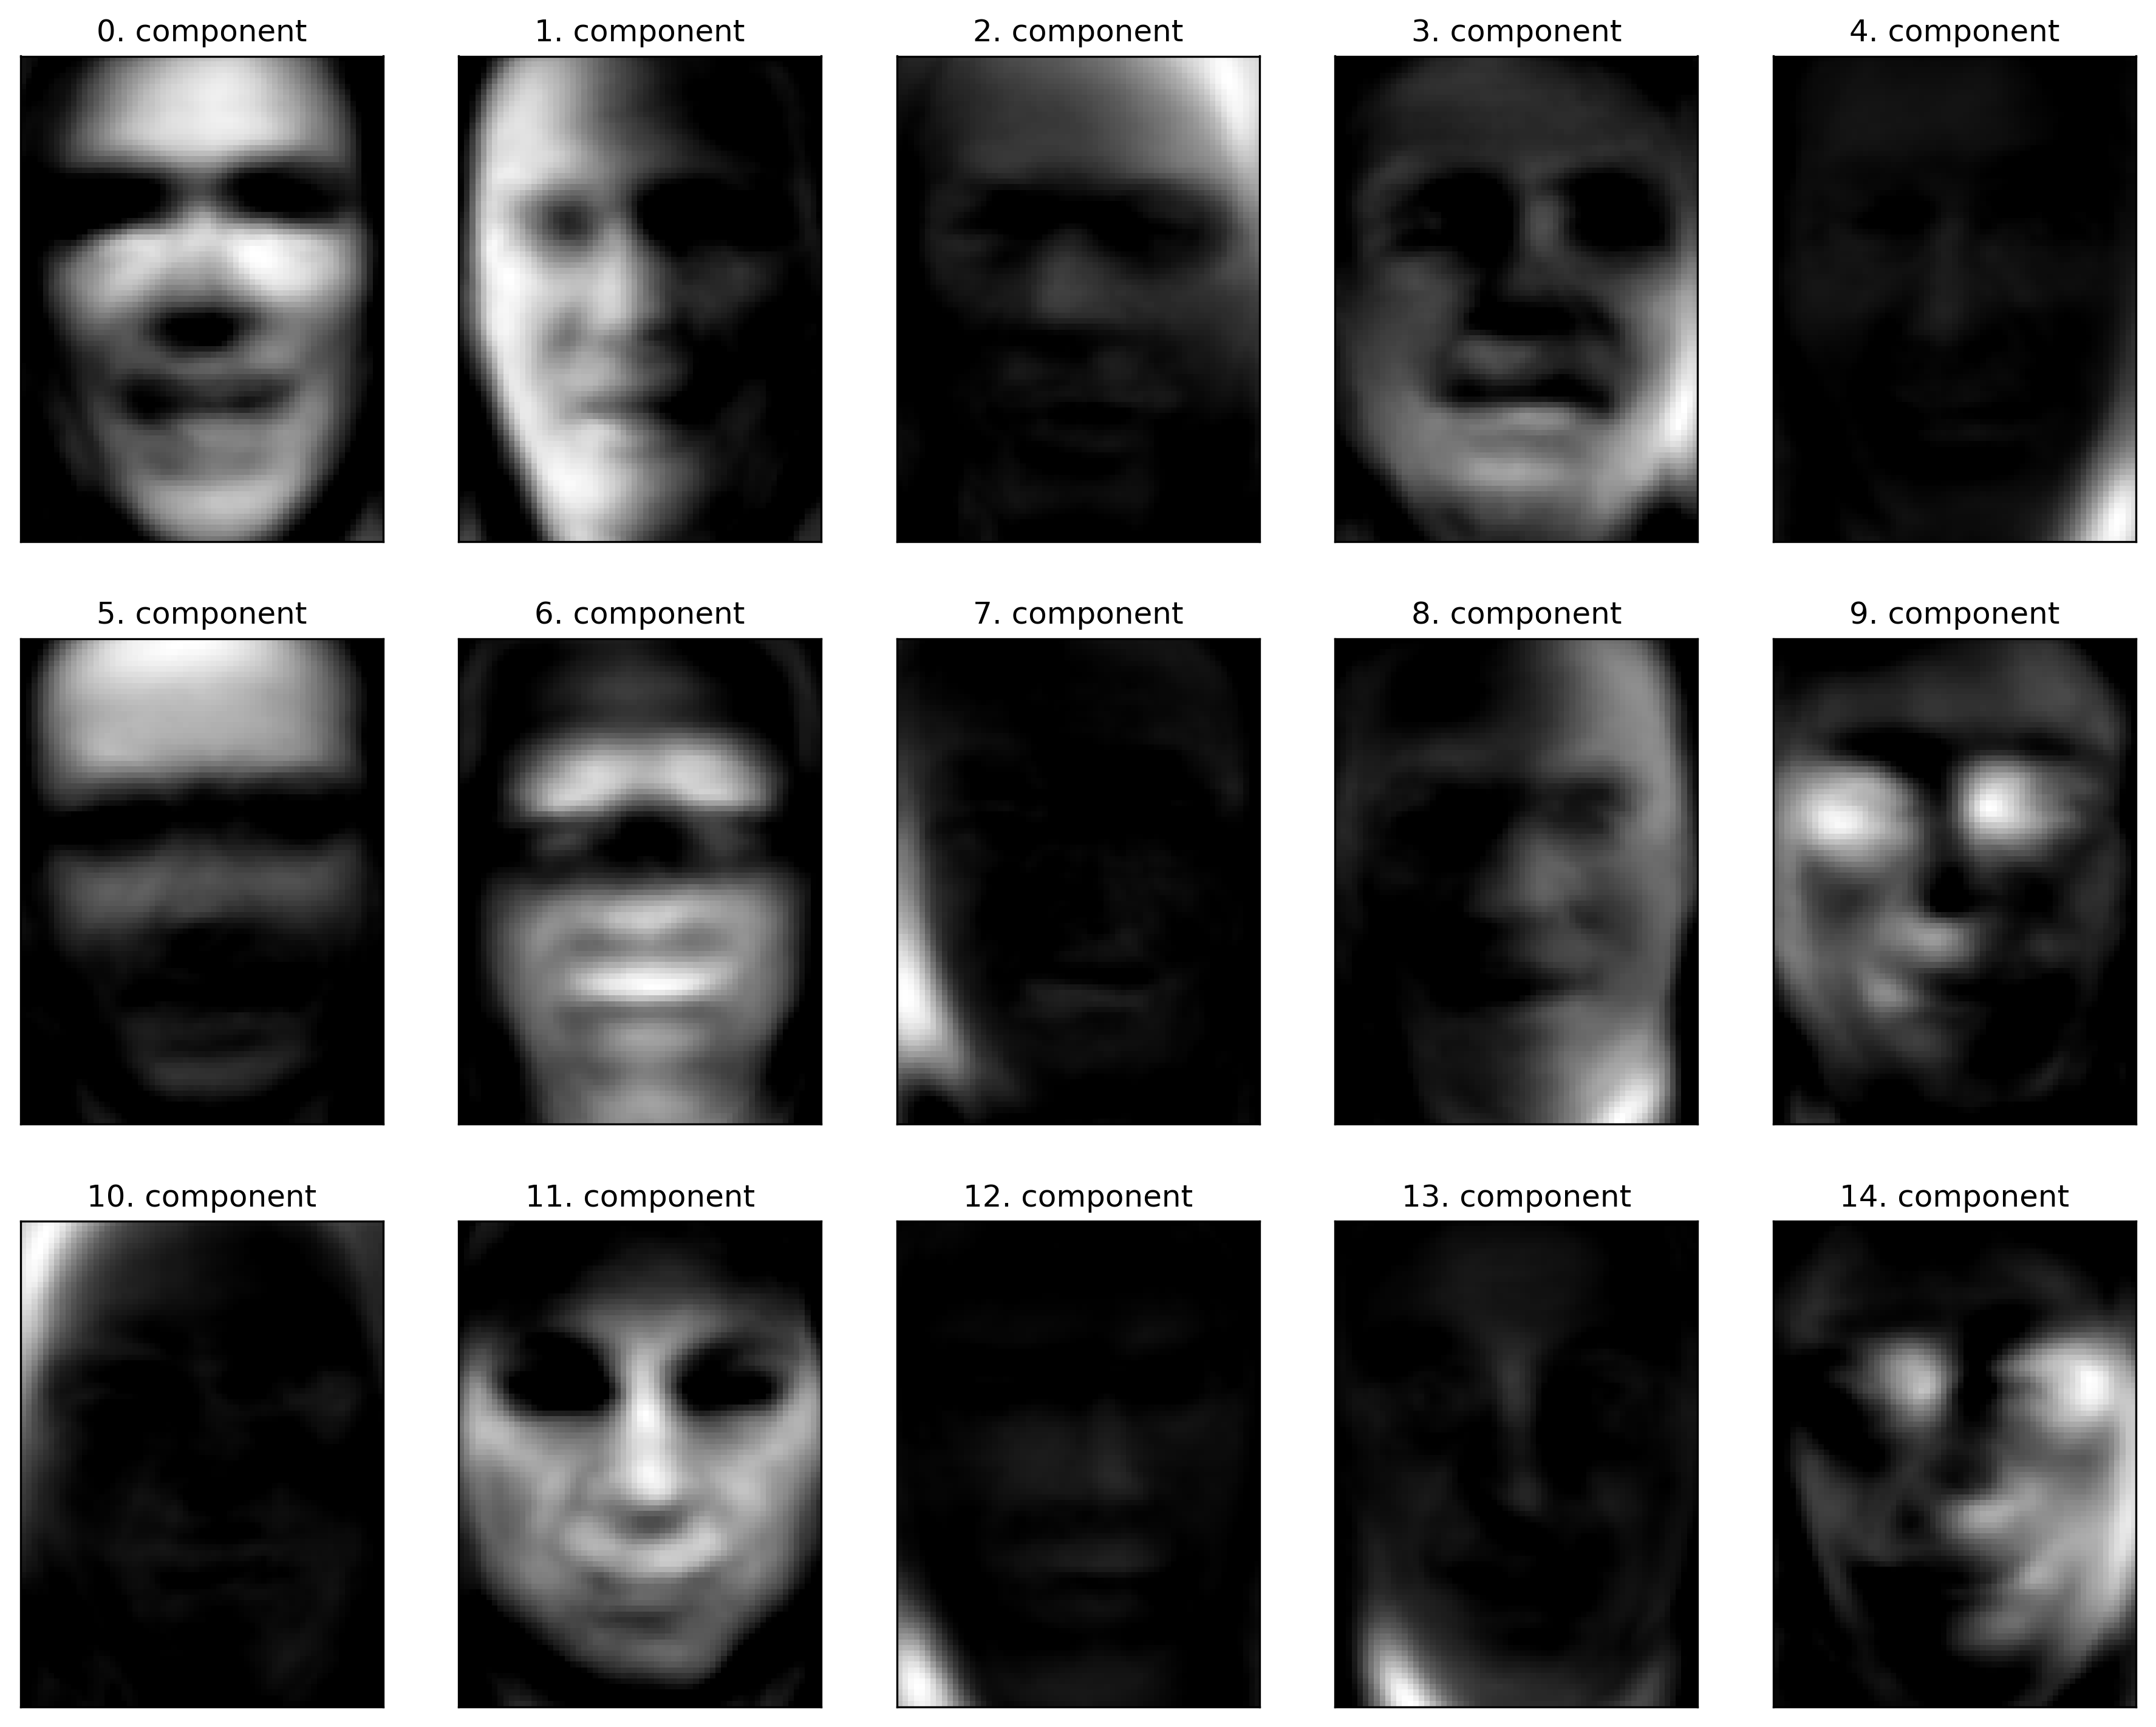

In [96]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0) # n_components = 축소하고자 하는 차원의 개수
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

print("Transformed Train Data Shape:", X_train_nmf.shape)
print("Transformed Test Data Shape:", X_test_nmf.shape)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

- 주성분 0~14 중 하나를 선택 --> compn 변수에 할당
- NMF 알고리즘에 의하여 변환된 훈련 데이터: W (1486, 15)
- 변환된 훈련 데이터의 각 특성중 compn 위치 값이 가장 큰 10개 선택하여 해당 10개에 대한 원본 데이터를 이미지 형태로 출력

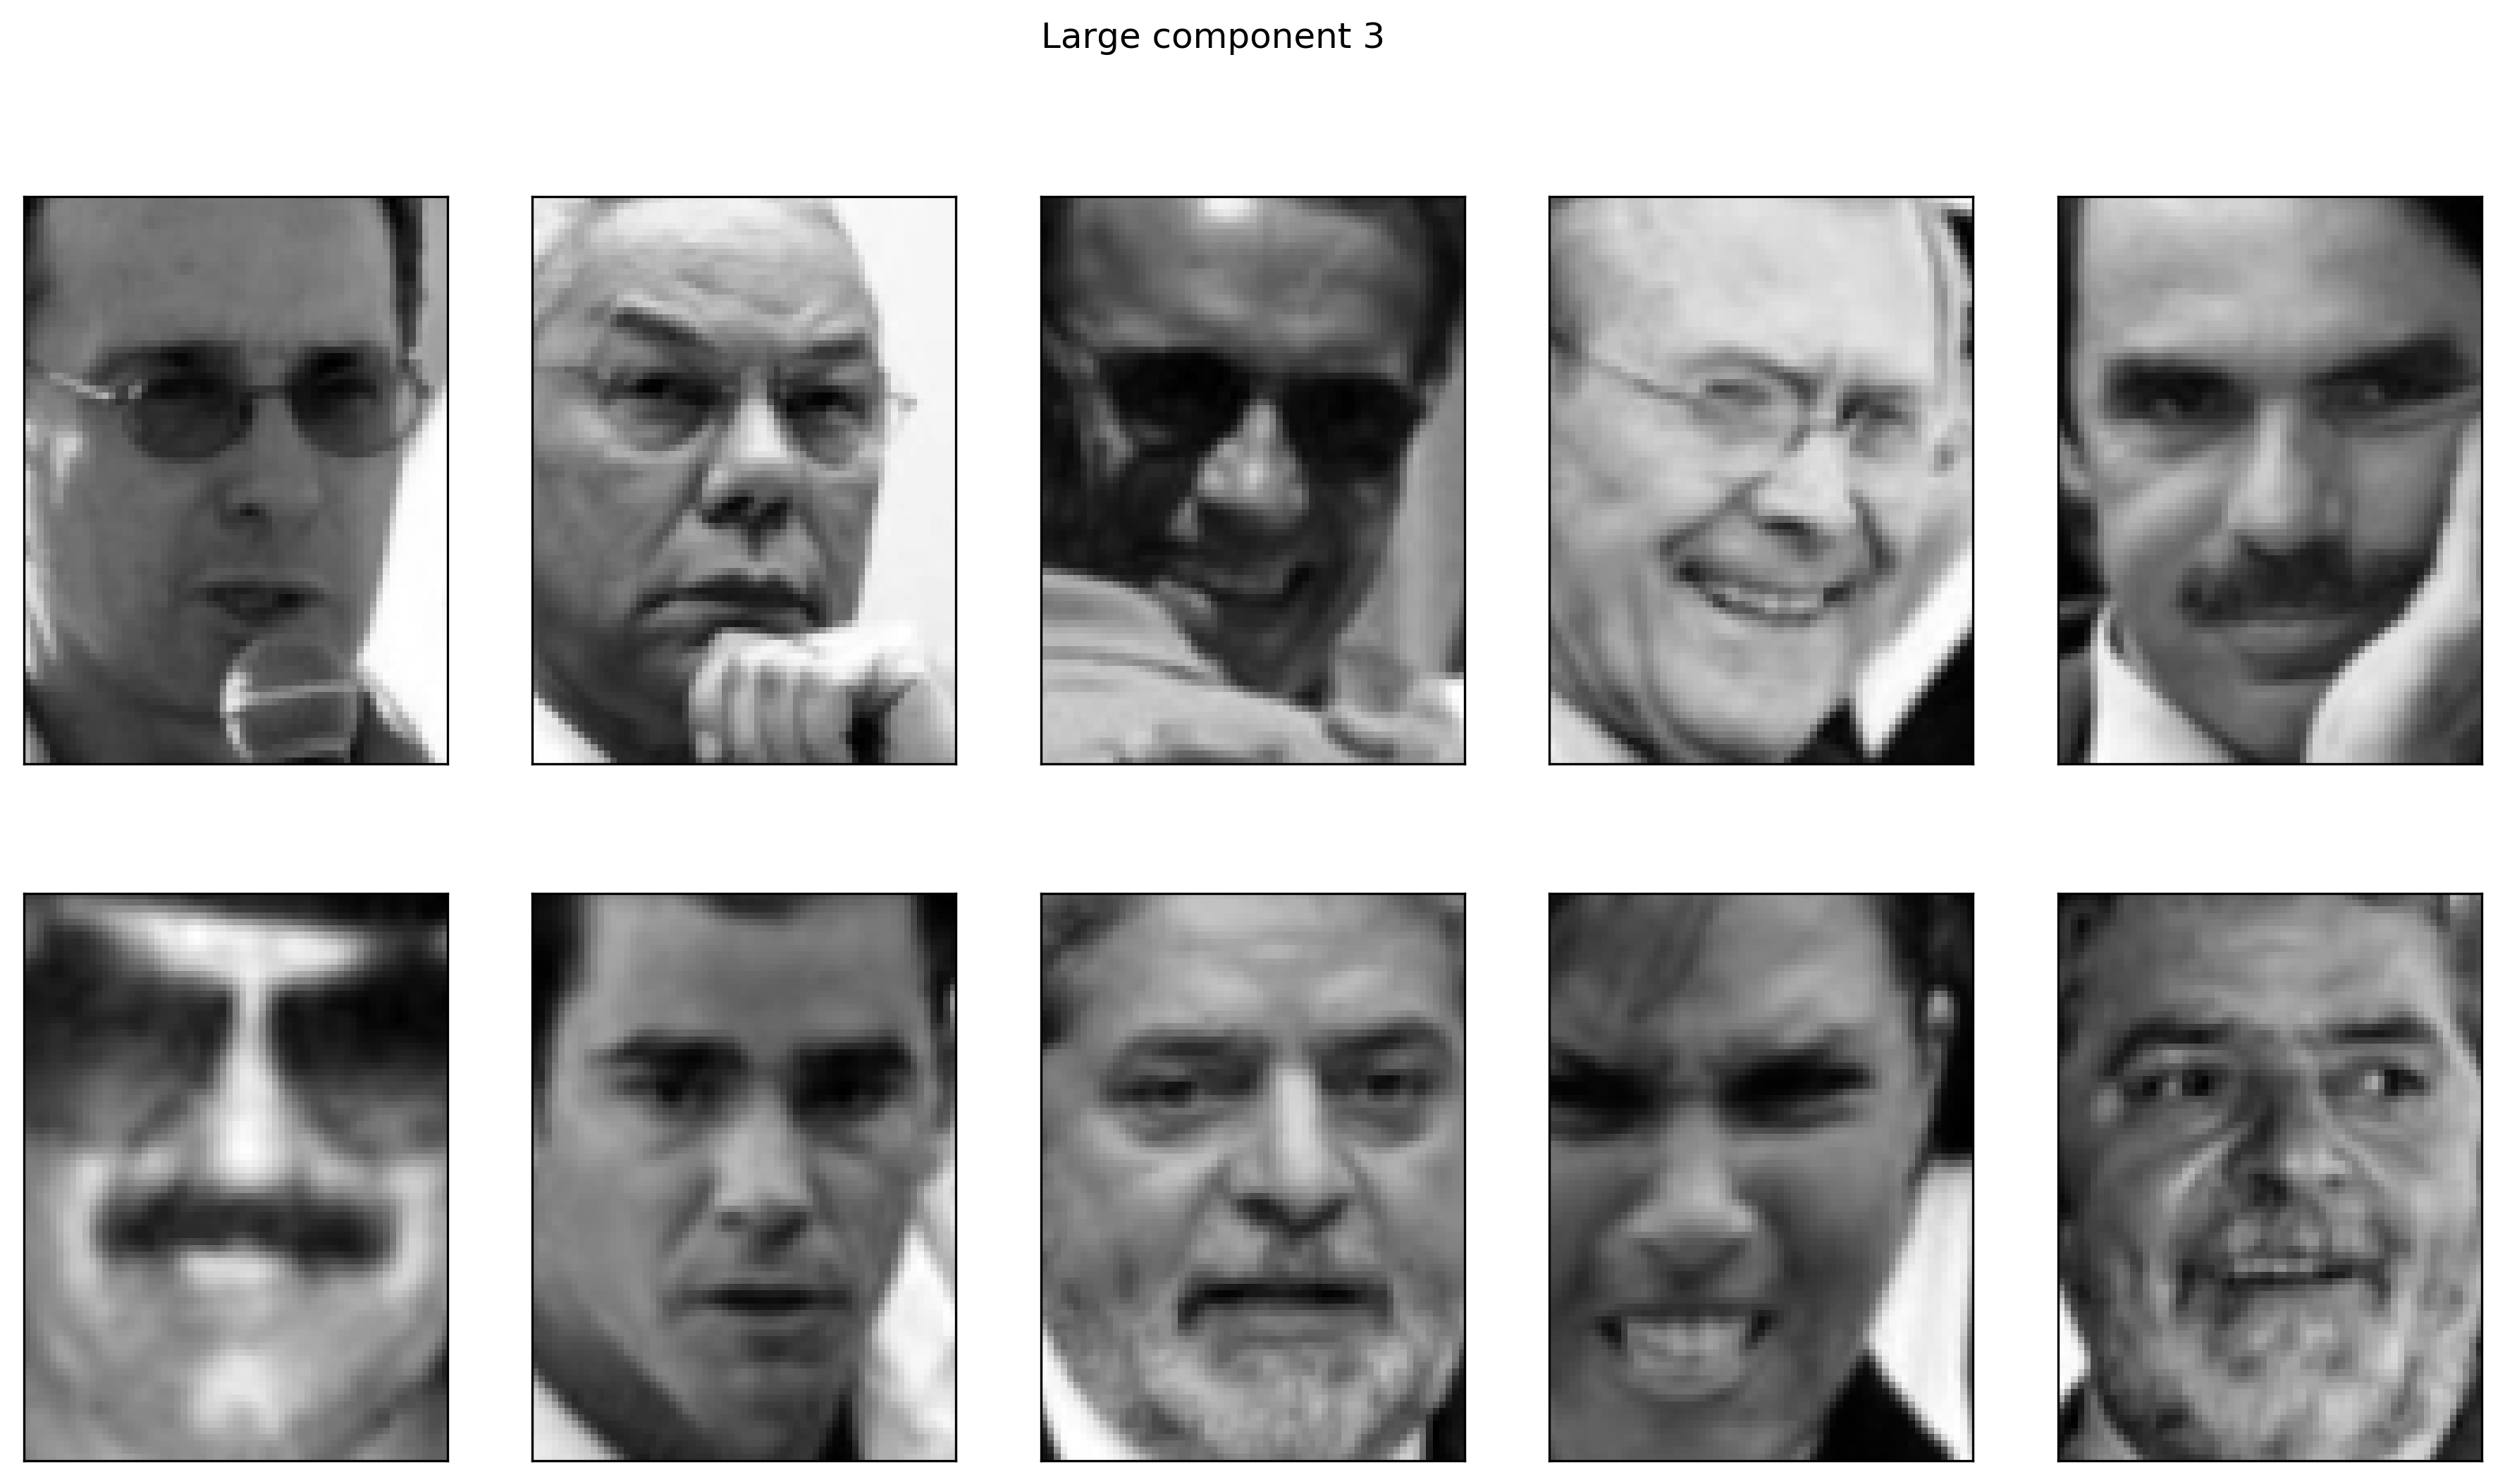

In [45]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

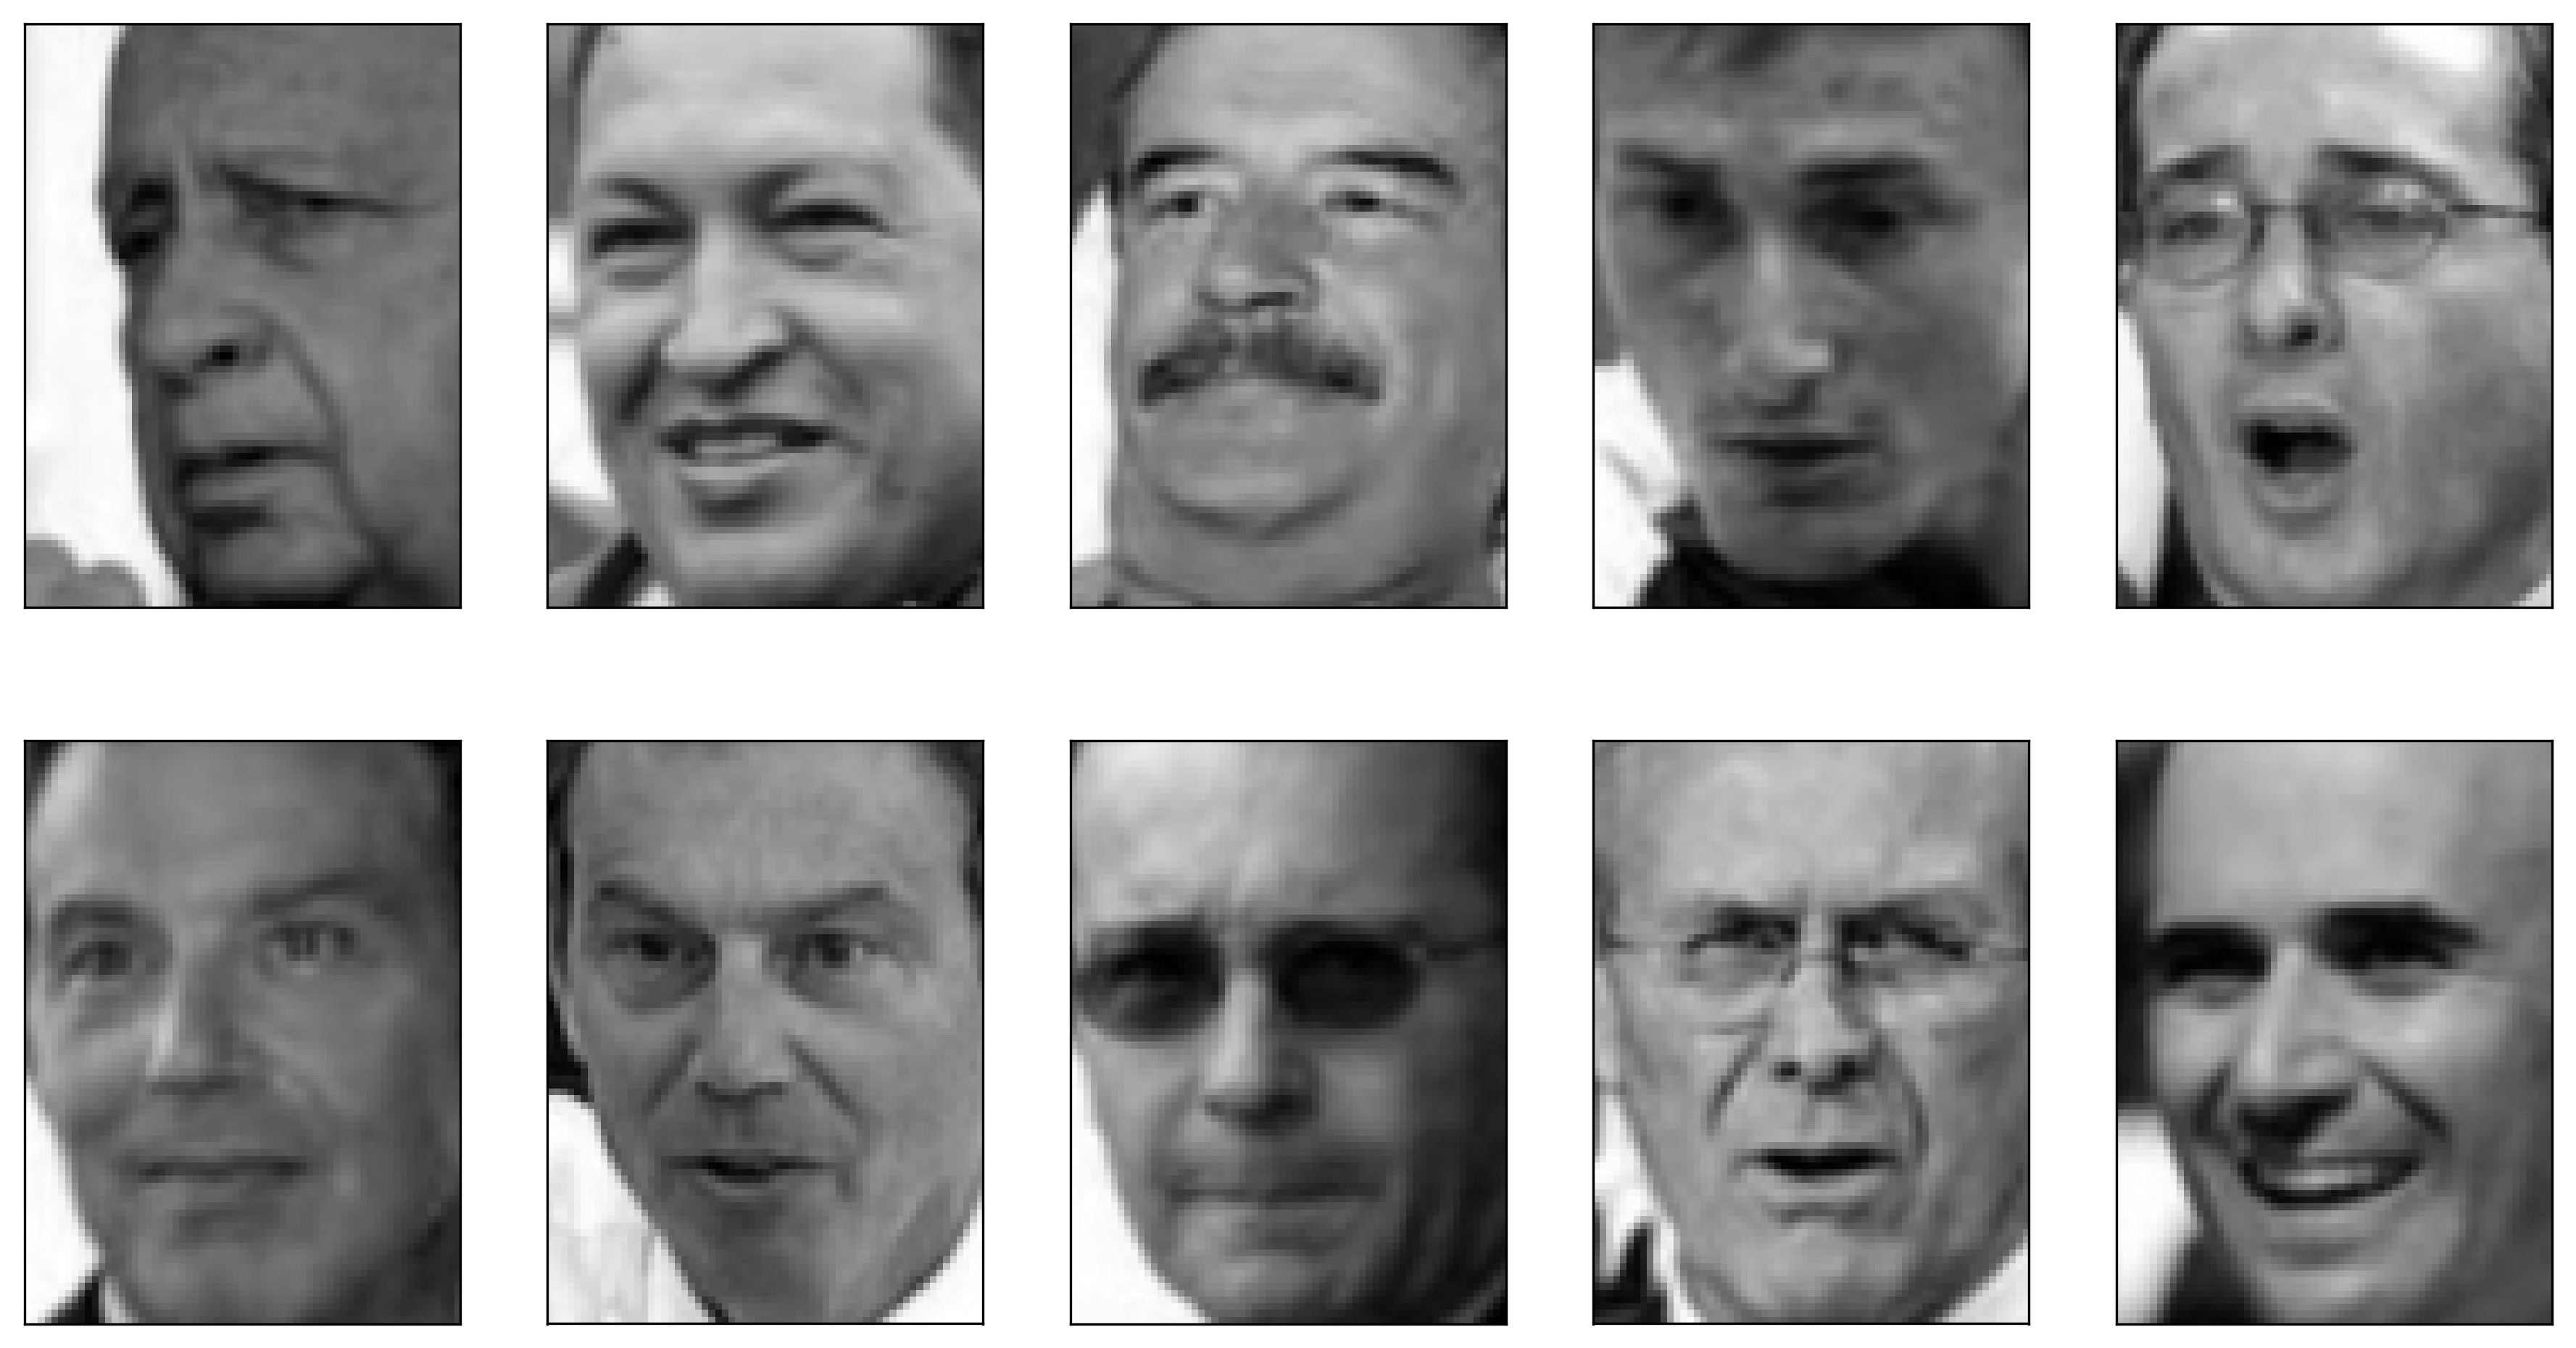

In [46]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

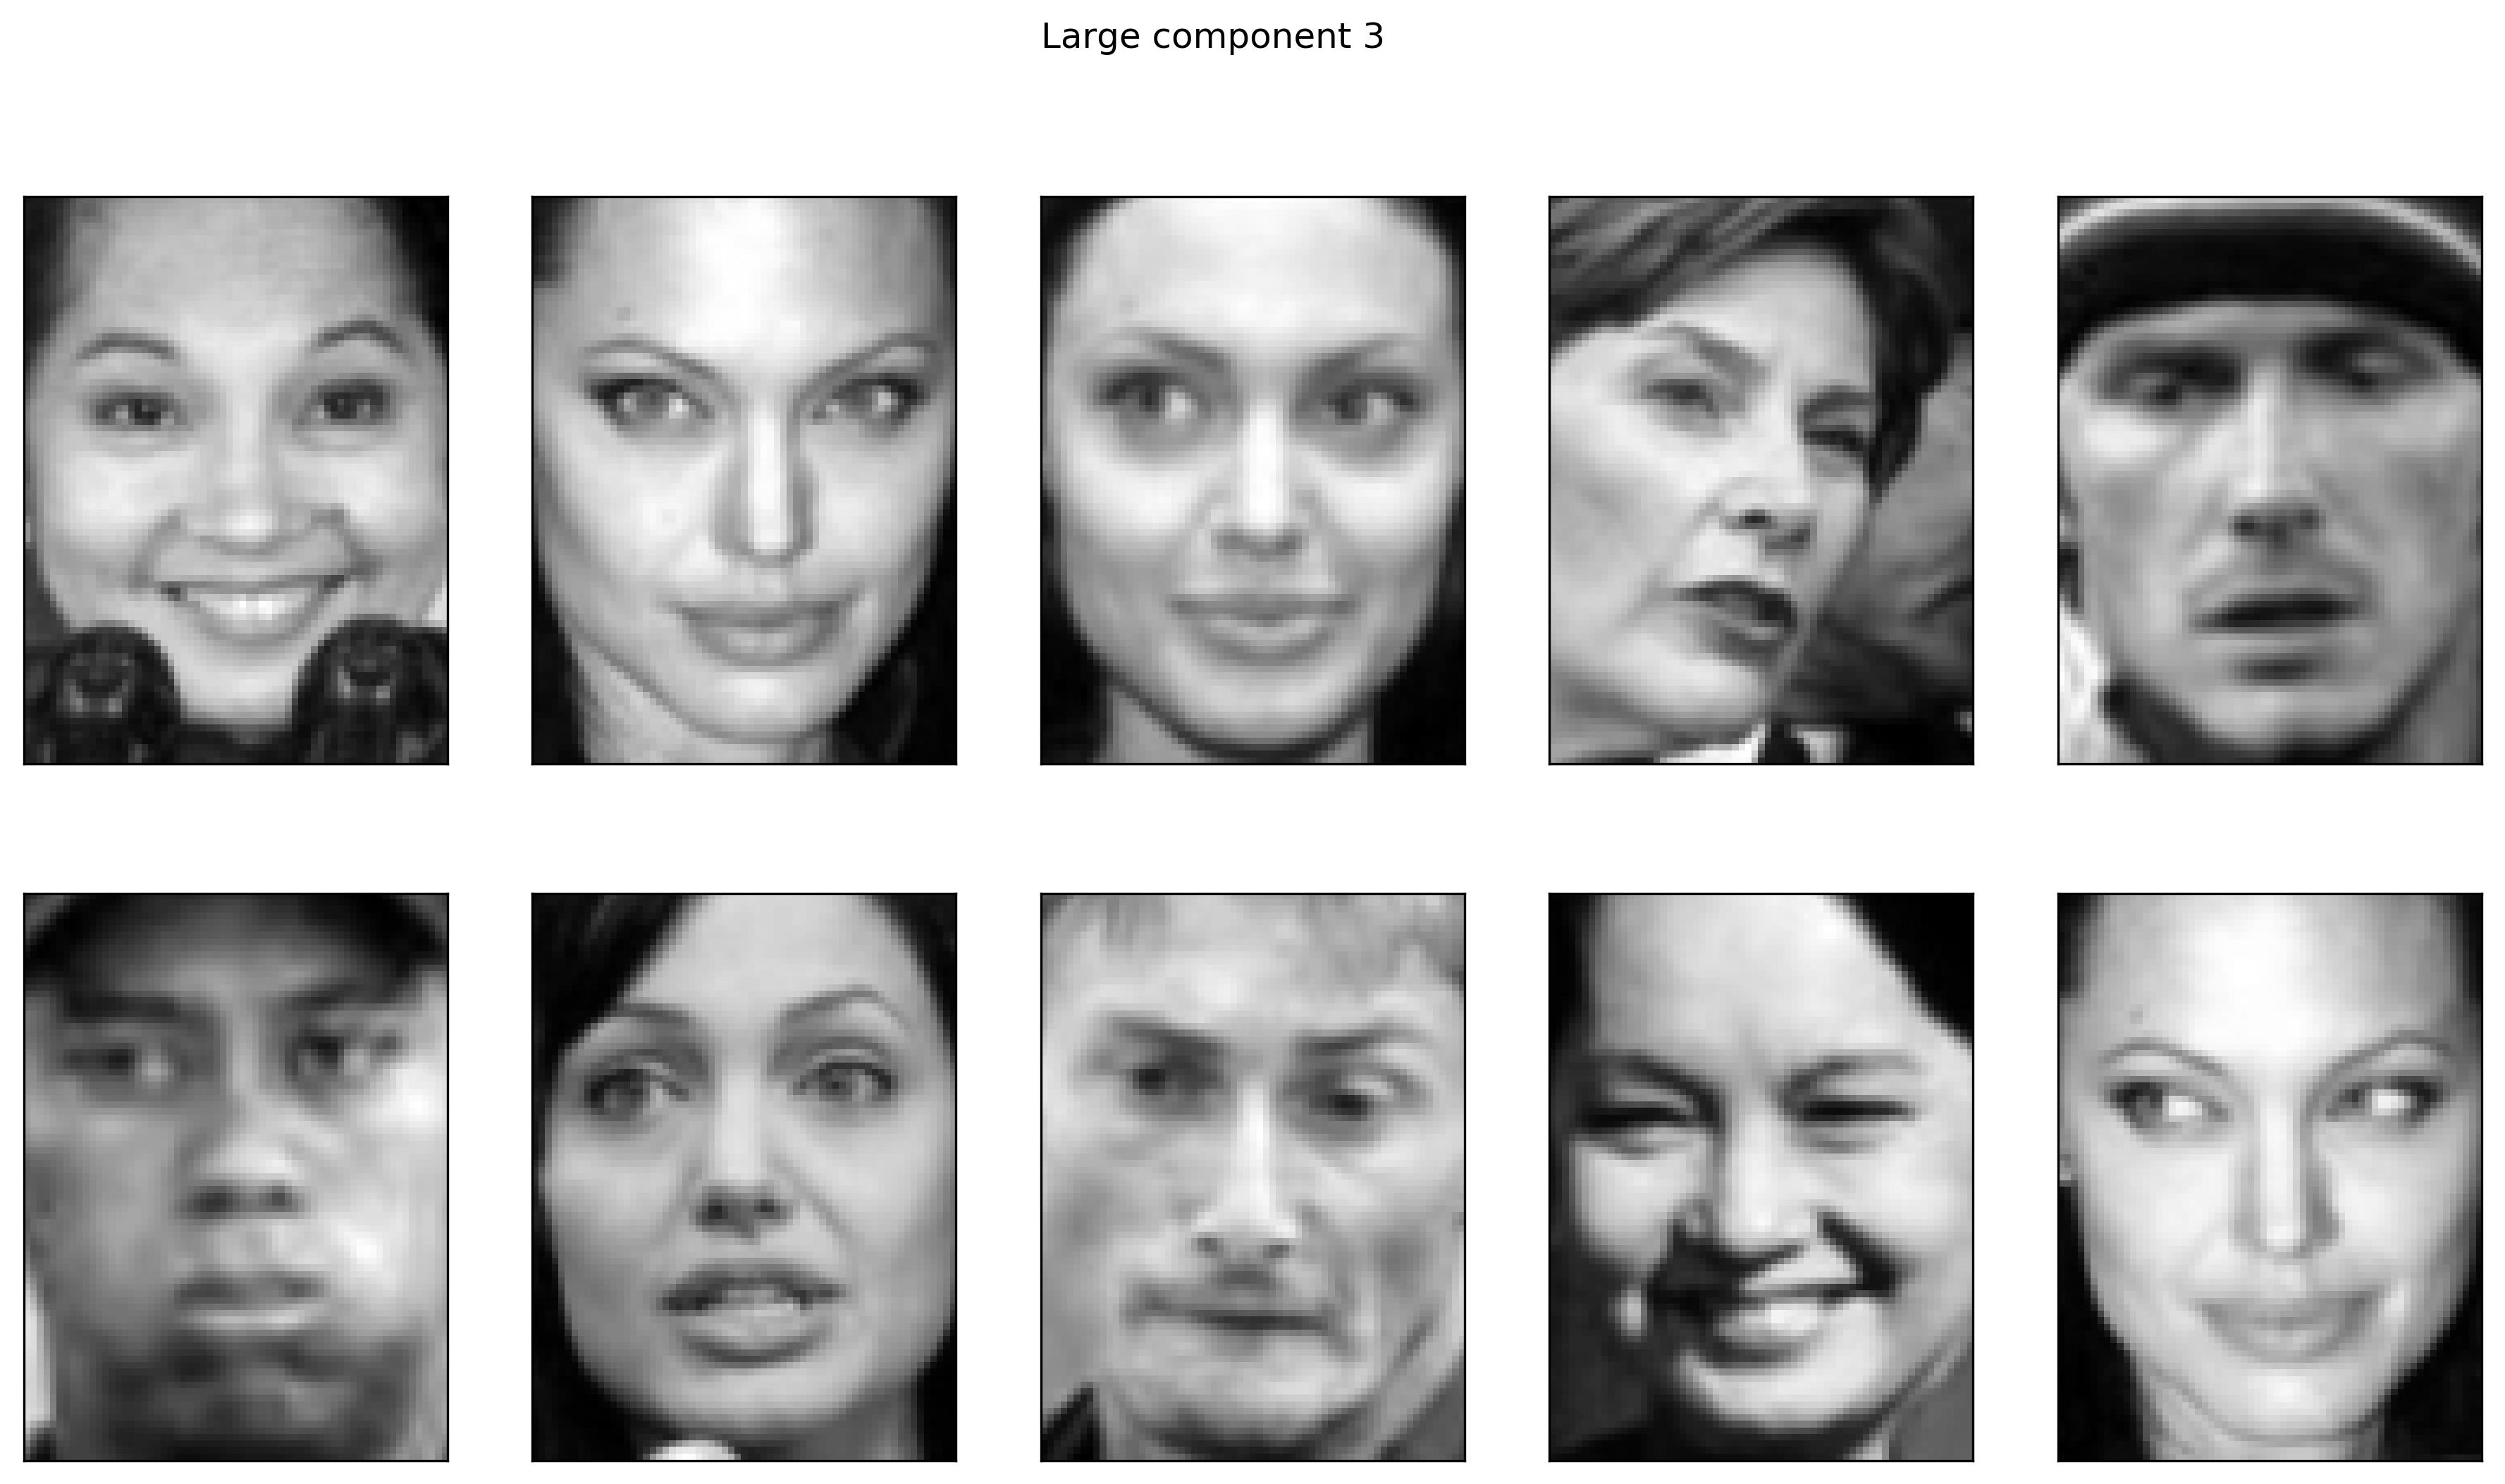

In [47]:
compn = 11
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Shape of S: (2000, 3)
2.6540820277281183
2.489088868975839
1.0775743294863065



Text(0,0.5,'Signal')

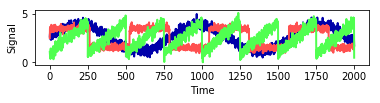

In [17]:
S = mglearn.datasets.make_signals()
print("Shape of S: {}".format(S.shape))
print(S[0][0])
print(S[0][1])
print(S[0][2])
print()

plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

Shape of S: (2000, 3)
Shape of A: (100, 3)
0.548813503927
0.715189366372
0.602763376072

0.544883182997
0.423654799339
0.645894113067

Shape of X (=S * A.T): (2000, 100)


Text(0,0.5,'Measurements')

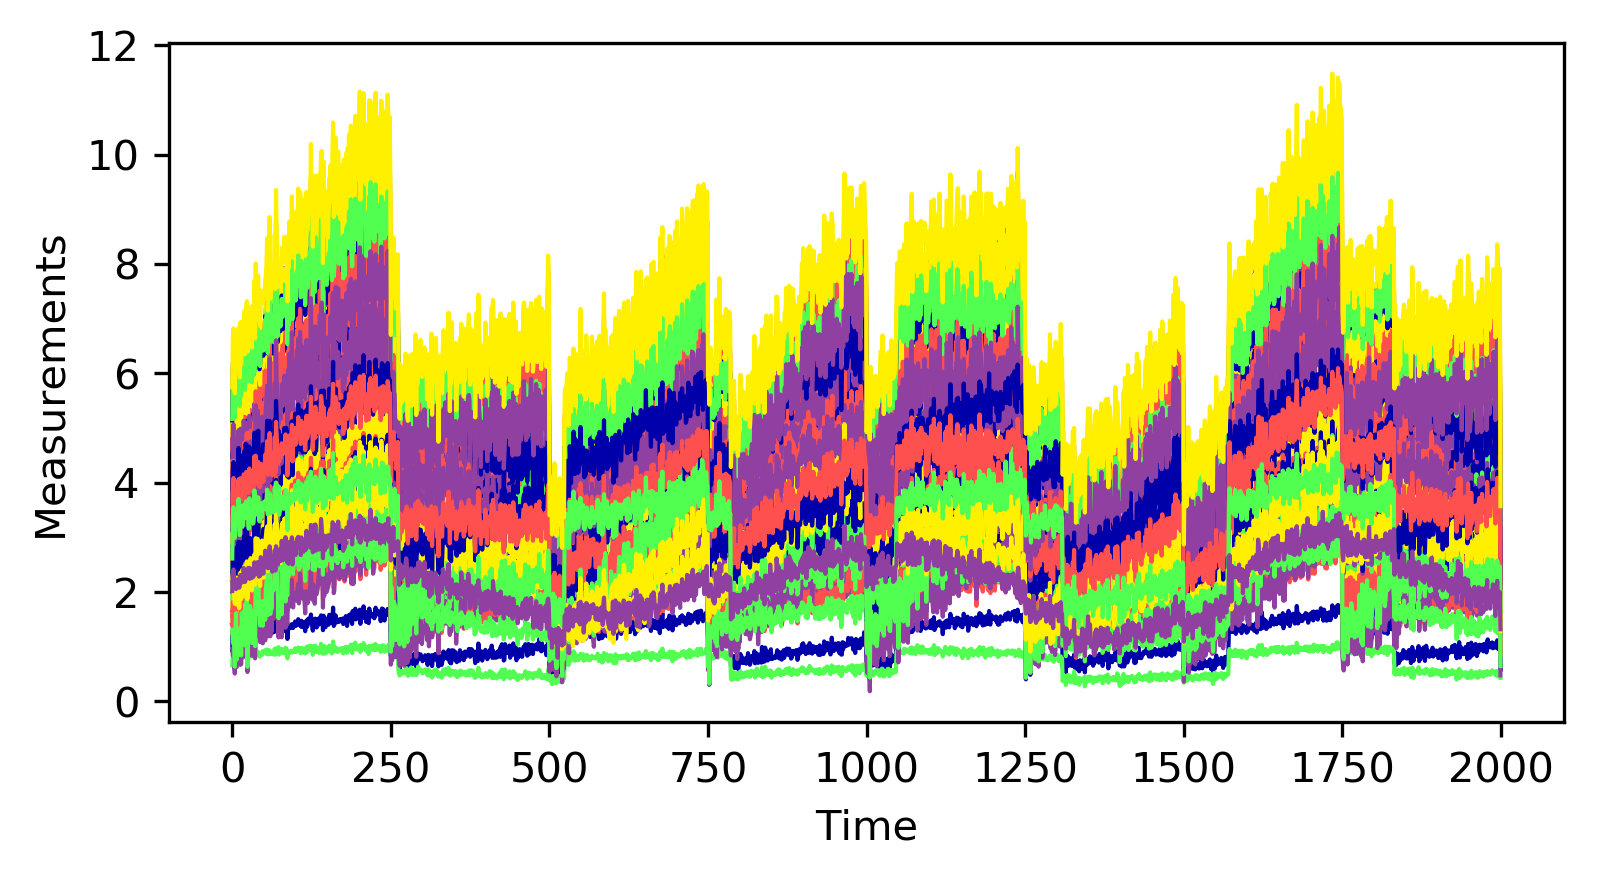

In [102]:
print("Shape of S: {}".format(S.shape))

# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
print("Shape of A: {}".format(A.shape))
print(A[0][0])
print(A[0][1])
print(A[0][2])
print()
print(A[1][0])
print(A[1][1])
print(A[1][2])
print()

X = np.dot(S, A.T)
print("Shape of X (=S * A.T): {}".format(X.shape))

plt.figure(figsize=(6, 3))
plt.plot(X, '-', linewidth=1.0)
plt.xlabel("Time")
plt.ylabel("Measurements")

In [50]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("NMF - Recovered signal shape: {}".format(S_.shape))

NMF - Recovered signal shape: (2000, 3)


In [51]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("PCA - Recovered signal shape: {}".format(H.shape))

PCA - Recovered signal shape: (2000, 3)


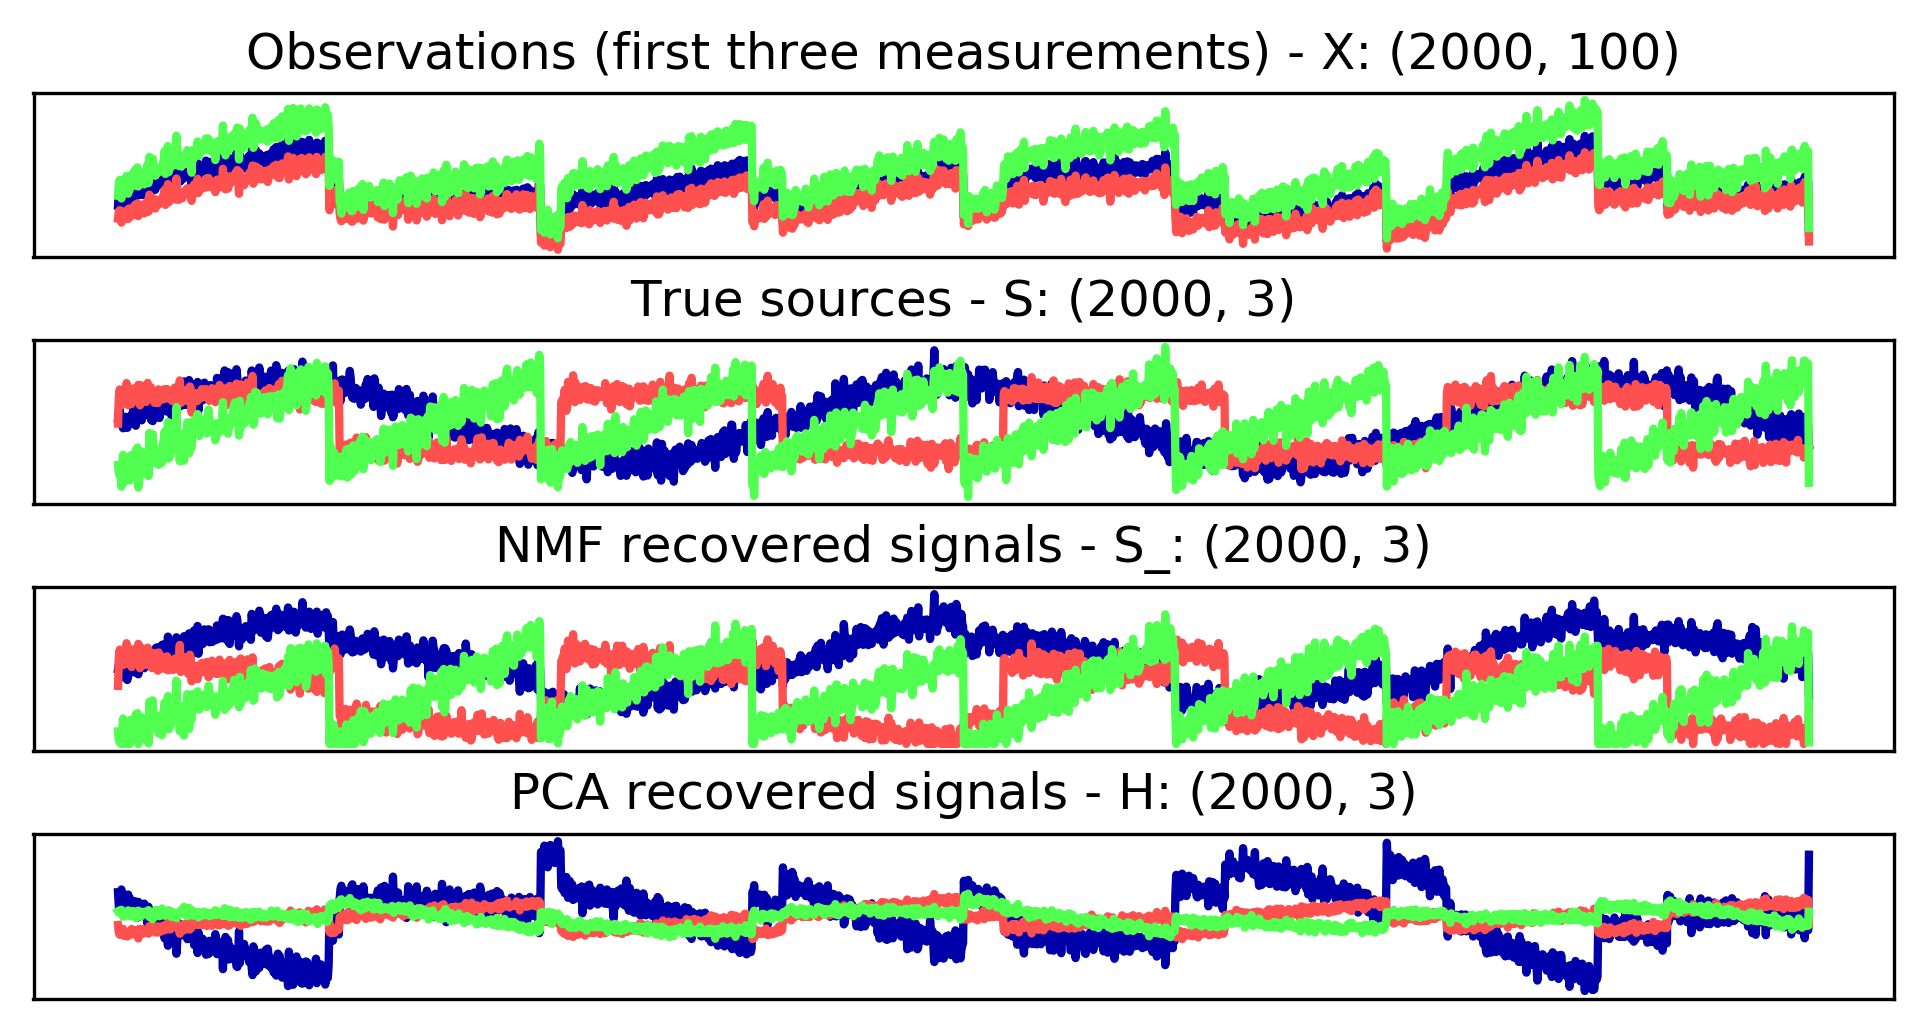

In [52]:
models = [X, S, S_, H]
names = ['Observations (first three measurements) - X: (2000, 100)',
         'True sources - S: (2000, 3)',
         'NMF recovered signals - S_: (2000, 3)',
         'PCA recovered signals - H: (2000, 3)']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')